# **Data Wrangling**


> Assessment-3



> **Pragy Parashar** - 31940757

# **Connecting to Drive**

In [1]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Installing and Importing Libraries**

In [2]:
pip install PyPDF2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy
import matplotlib
import geopandas as gpd 
from shapely.geometry import Point, Polygon
%matplotlib inline
import shapefile
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from urllib.request import urlopen
from urllib.parse import quote
from bs4 import BeautifulSoup
import re
import time
import PyPDF2
import numpy as np
from scipy import stats
import math as mat
from sklearn import preprocessing # for linear-regression and scaling
import matplotlib.pyplot as plt   # for plotting graph
from sklearn.model_selection import train_test_split       # for test-train split
from sklearn.linear_model import LinearRegression

# **Importing XML and JSON Data**
In this section we will import the property data from xml and json data for the properties across melbourne which is then stored as a df which will form our first four columns for the requirement. The data from both the sources are merged together and after that the duplicates are removed from the combined data.

In [6]:
# reads json file and saves as df
df_json = pd.read_json('/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/student_data/json/31940757.json')
df_json.head()

,property_id,lat,lng,addr_street
0,2629,-37.812851,144.875579,10 Adaleigh Street
1,62474,-37.829105,145.238813,10 Devon Avenue
2,75515,-37.899528,145.048075,9 Kooringa Road
3,22377,-37.749881,144.960006,24 White Street
4,78258,-37.927869,145.174585,6 Whitehaven Crescent


In [7]:
# reads xml file and saves as df
df_xml = pd.read_xml('/content/drive/MyDrive/Assessment3/InputFiles/31940757.xml')
df_xml.head()

,property_id,lat,lng,addr_street
0,6505,-37.785835,144.817627,25 McIntosh Street
1,61863,-37.806797,145.235915,36-38 Oliver Street
2,41600,-37.740291,145.091952,14 Royston Street
3,24889,-37.579870,144.910267,1 Kelway Street
4,79606,-37.995922,145.167472,12 Sunnyvale Crescent


In [8]:
# concat function will merge the data from both the sources
combined_df = pd.concat([df_json, df_xml], ignore_index=True)
combined_df.head()

,property_id,lat,lng,addr_street
0,2629,-37.812851,144.875579,10 Adaleigh Street
1,62474,-37.829105,145.238813,10 Devon Avenue
2,75515,-37.899528,145.048075,9 Kooringa Road
3,22377,-37.749881,144.960006,24 White Street
4,78258,-37.927869,145.174585,6 Whitehaven Crescent


In [9]:
# count of unique ids in the combined df
unique_id_count = combined_df['property_id'].nunique()

# Print the count of unique values
print(unique_id_count)

2461


In [10]:
# gets duplicate ids after merging the data
duplicate_ids = combined_df[combined_df['property_id'].duplicated()]
duplicate_ids.head()

,property_id,lat,lng,addr_street
246,69977,-37.863837,145.097236,35 Douglas Street
362,41100,-37.700878,145.071846,7/434 Grimshaw Street
438,45822,-37.719902,145.128464,132 Rattray Road
633,48675,-37.800475,145.044032,7 Childers Street
678,15745,-37.738191,144.882060,40 Newman Street


In [11]:
# removed the duplicates
clean_combined_df = combined_df.drop_duplicates()

In [12]:
duplicate_ids = clean_combined_df[clean_combined_df['property_id'].duplicated()]
duplicate_ids

,property_id,lat,lng,addr_street
2238,48675,-37.800475,145.044032,7 Childers Street
2493,2629,-37.812851,144.875579,10 Adaleigh Street


Even after dropping the duplicates in the above step. We can still observe two duplicates at index position 2238 and 2493 which are removed below.

In [13]:
# removes the additional duplicates
clean_combined_df = clean_combined_df.drop([2238,2493])

In [14]:
# checks for duplicates
duplicate_ids = clean_combined_df[clean_combined_df['property_id'].duplicated()]
duplicate_ids

,property_id,lat,lng,addr_street


Now that we have removed the duplicates we will reset the index of the df.

In [15]:
# reset index values
clean_combined_df = clean_combined_df.reset_index()

In [16]:
# creates additional columns in df with defaut values as NA
clean_combined_df["suburb"] = "NA"
clean_combined_df["lga"] = "NA"
clean_combined_df["closest_train_station_id"] = "NA"
clean_combined_df["distance_to_closest_train_station"] = "NA"
clean_combined_df["travel_min_to_MC"] = "NA"
clean_combined_df["direct_journey_flag"] = "NA"
clean_combined_df["number_of_houses"] = "NA"
clean_combined_df["number_of_units"] = "NA"
clean_combined_df["municipality"] = "NA"
clean_combined_df["aus_born_perc"] = "NA"
clean_combined_df["median_income"] = "NA"
clean_combined_df["median_house_price"] = "NA"
clean_combined_df["population"] = "NA"

In [17]:
# prints top 5 rows from df
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,1,62474,-37.829105,145.238813,10 Devon Avenue,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,75515,-37.899528,145.048075,9 Kooringa Road,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,22377,-37.749881,144.960006,24 White Street,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# **Importing Suburb Data**
In this section we will import the subrubs details for the properties using the provided "shp" file. Geopandas is used to read the shp file and the data is stored in a df.

In [18]:
# sets file path 
file_path  = "/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_suburb_boundary/VIC_LOCALITY_POLYGON_shp.shp"
# reads shp file and stores data in df
suburb_df = gpd.read_file(file_path) # reading the shape file
suburb_df.head()

,LC_PLY_PID,DT_CREATE,DT_RETIRE,LOC_PID,VIC_LOCALI,VIC_LOCA_1,VIC_LOCA_2,VIC_LOCA_3,VIC_LOCA_4,VIC_LOCA_5,VIC_LOCA_6,VIC_LOCA_7,geometry
0,6670,2011-08-31,NaN,VIC2615,2012-04-27,NaN,UNDERBOOL,NaN,NaN,G,NaN,2,"POLYGON ((141.74552 -35.07229, 141.74552 -35.0..."
1,6671,2011-08-31,NaN,VIC1986,2012-04-27,NaN,NURRAN,NaN,NaN,G,NaN,2,"POLYGON ((148.66877 -37.39571, 148.66876 -37.3..."
2,6672,2011-08-31,NaN,VIC2862,2012-04-27,NaN,WOORNDOO,NaN,NaN,G,NaN,2,"POLYGON ((142.92288 -37.97886, 142.90449 -37.9..."
3,6673,2011-08-31,NaN,VIC734,2017-08-09,NaN,DEPTFORD,NaN,NaN,G,NaN,2,"POLYGON ((147.82336 -37.66001, 147.82313 -37.6..."
4,6674,2011-08-31,NaN,VIC2900,2012-04-27,NaN,YANAC,NaN,NaN,G,NaN,2,"POLYGON ((141.27978 -35.99859, 141.27989 -35.9..."


For finding the suburbs of the properties we iterate through the main df and create a point object using coordinates of the property. Then this point object is checked to be present in the geometry column of the suburb data. If match is found the repective suburb is added to the list which is then used to update the df with the suburb name.

In [19]:
# creates an empty list to store suburb names
suburb_list = []
# iterate through the combined df
for k,v in clean_combined_df.iterrows():
    lat = v['lat']
    lon = v['lng']
    # iterates through suburb df
    for i,r in suburb_df.iterrows():
      # creates a point object from the coordinates of properties
      point = Point(lon,lat)
      # checka if the coordinates of the property are contained in that of a suburb
      if r["geometry"].contains(point):
        # adds the match to the suburb list
        suburb_list.append(r["VIC_LOCA_2"]) 
# adds the suburb to the respective proeprties in the combined df
clean_combined_df["suburb"] = suburb_list
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


# **Webscraping**
In this section we will be getting the values of the columns using webscraping techniques. 

In [20]:
# creates a set of unique suburbs
suburb_set = list(set(suburb_list))
len(suburb_set)

167

We have 167 unique suburbs across Melbourne which means we will have to scrape through 167 websites for data. We are going to batch process the data as 40 urls per iteration. After every successful we have put a sleep time for 2 min in order to wait for url to process the resposne for the next batch. The scraped data is stored in a dictionary which holds the suburb name as the key.

In [21]:
# creates empty dictionary to store the scraped values
suburb_dict = {}
# iterates through the first 40 suburbs in the list
for suburb in suburb_set[:40]:
  # sets the url for each suburb
  url = "http://house.speakingsame.com/profile.php?q=" + quote(suburb) + "%2C+VIC"
  # browse through the url
  html = urlopen(url)
  # creates a soup object
  bsObj = BeautifulSoup(html, 'html.parser')

  # Extracting number of houses/units
  sales_table = bsObj.find('table', {'cellspacing': '10', 'style': 'font-size:13px'})
  if sales_table is not None:
    # Extract the number of houses and units
    rows = sales_table.find_all('tr')
    houses,units = rows[3].find_all('td')[2].text.strip().split('/')

  # Extracting municipality
  municipality = bsObj.find('a', href=lambda href: href and 'city.php' in href).text

  # Extracting Australian born percentage
  aus_born_percentage = bsObj.find('td', text='Australian Born').find_next('td').text.strip()

  # Extracting median household income
  median_income = bsObj.find('td', text='Weekly income').find_next('td').text.strip()

  # Extracting median house price
  median_house_price = bsObj.find('td', text='House').find_next('td').text.strip().split()[0]

  # Extracting population
  population = bsObj.find('td', text='All People').find_next('td').text.strip()

  suburb_dict[suburb]= (houses, units, municipality, aus_born_percentage,
                    median_income, median_house_price,  population)
print(suburb_dict)
# delays next execution for 120 seconds
time.sleep(600)

<ipython-input-21-9a9aee344100>:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  aus_born_percentage = bsObj.find('td', text='Australian Born').find_next('td').text.strip()
<ipython-input-21-9a9aee344100>:26: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  median_income = bsObj.find('td', text='Weekly income').find_next('td').text.strip()
<ipython-input-21-9a9aee344100>:29: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  median_house_price = bsObj.find('td', text='House').find_next('td').text.strip().split()[0]
<ipython-input-21-9a9aee344100>:32: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  population = bsObj.find('td', text='All People').find_next('td').text.strip()


{'BRAYBROOK': ('2822 ', ' 1654', 'Maribyrnong', '52%', '$792', '$755,400', '6573'), 'BAYSWATER': ('4737 ', ' 3089', 'Knox', '77%', '$1,186', '$865,500', '19945'), 'CROYDON NORTH': ('2487 ', ' 783', 'Maroondah', '81%', '$1,267', '$1,020,800', '37491'), 'TOORAK': ('4088 ', ' 5974', 'Stonnington', '72%', '$1,977', '$2,752,300', '12797'), 'PARKDALE': ('4160 ', ' 2433', 'Kingston', '76%', '$1,492', '$1,341,800', '24045'), 'VERMONT': ('3636 ', ' 1030', 'Whitehorse', '71%', '$1,459', '$1,186,300', '20802'), 'MONTMORENCY': ('3368 ', ' 1434', 'Banyule', '87%', '$1,457', '$1,111,000', '8154'), 'BROADMEADOWS': ('4395 ', ' 1983', 'Hume', '58%', '$762', '$565,700', '18510'), 'SYDENHAM': ('2811 ', ' 1400', 'Brimbank', '64%', '$1,491', '$658,000', '27356'), 'FLEMINGTON': ('1877 ', ' 3086', 'Moonee Valley', '62%', '$1,401', '$1,069,400', '14523'), 'HADFIELD': ('2326 ', ' 712', 'Moreland', '66%', '$1,004', '$805,000', '27707'), 'HILLSIDE': ('4717 ', ' 798', 'Melton', '64%', '$1,491', '$867,300', '27356

In [22]:
# iterates through next 40 batch of urls
for suburb in suburb_set[40:80]:
  url = "http://house.speakingsame.com/profile.php?q=" + quote(suburb) + "%2C+VIC"
  html = urlopen(url)
  bsObj = BeautifulSoup(html, 'html.parser')

  # Extracting number of houses/units
  sales_table = bsObj.find('table', {'cellspacing': '10', 'style': 'font-size:13px'})
  if sales_table is not None:
    # Extract the number of houses and units
    rows = sales_table.find_all('tr')
    houses,units = rows[3].find_all('td')[2].text.strip().split('/')

  # Extracting municipality
  municipality = bsObj.find('a', href=lambda href: href and 'city.php' in href).text

  # Extracting Australian born percentage
  aus_born_percentage = bsObj.find('td', text='Australian Born').find_next('td').text.strip()

  # Extracting median household income
  median_income = bsObj.find('td', text='Weekly income').find_next('td').text.strip()

  # Extracting median house price
  median_house_price = bsObj.find('td', text='House').find_next('td').text.strip().split()[0]

  # Extracting population
  population = bsObj.find('td', text='All People').find_next('td').text.strip()

  suburb_dict[suburb]= (houses, units, municipality, aus_born_percentage,
                      median_income, median_house_price,  population)
print(suburb_dict)
time.sleep(600)

<ipython-input-22-8ed1981969a1>:18: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  aus_born_percentage = bsObj.find('td', text='Australian Born').find_next('td').text.strip()
<ipython-input-22-8ed1981969a1>:21: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  median_income = bsObj.find('td', text='Weekly income').find_next('td').text.strip()
<ipython-input-22-8ed1981969a1>:24: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  median_house_price = bsObj.find('td', text='House').find_next('td').text.strip().split()[0]
<ipython-input-22-8ed1981969a1>:27: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  population = bsObj.find('td', text='All People').find_next('td').text.strip()


{'BRAYBROOK': ('2822 ', ' 1654', 'Maribyrnong', '52%', '$792', '$755,400', '6573'), 'BAYSWATER': ('4737 ', ' 3089', 'Knox', '77%', '$1,186', '$865,500', '19945'), 'CROYDON NORTH': ('2487 ', ' 783', 'Maroondah', '81%', '$1,267', '$1,020,800', '37491'), 'TOORAK': ('4088 ', ' 5974', 'Stonnington', '72%', '$1,977', '$2,752,300', '12797'), 'PARKDALE': ('4160 ', ' 2433', 'Kingston', '76%', '$1,492', '$1,341,800', '24045'), 'VERMONT': ('3636 ', ' 1030', 'Whitehorse', '71%', '$1,459', '$1,186,300', '20802'), 'MONTMORENCY': ('3368 ', ' 1434', 'Banyule', '87%', '$1,457', '$1,111,000', '8154'), 'BROADMEADOWS': ('4395 ', ' 1983', 'Hume', '58%', '$762', '$565,700', '18510'), 'SYDENHAM': ('2811 ', ' 1400', 'Brimbank', '64%', '$1,491', '$658,000', '27356'), 'FLEMINGTON': ('1877 ', ' 3086', 'Moonee Valley', '62%', '$1,401', '$1,069,400', '14523'), 'HADFIELD': ('2326 ', ' 712', 'Moreland', '66%', '$1,004', '$805,000', '27707'), 'HILLSIDE': ('4717 ', ' 798', 'Melton', '64%', '$1,491', '$867,300', '27356

In [23]:
for suburb in suburb_set[80:120]:
  url = "http://house.speakingsame.com/profile.php?q=" + quote(suburb) + "%2C+VIC"
  html = urlopen(url)
  bsObj = BeautifulSoup(html, 'html.parser')
  
  # Extracting number of houses/units
  sales_table = bsObj.find('table', {'cellspacing': '10', 'style': 'font-size:13px'})
  if sales_table is not None:
    # Extract the number of houses and units
    rows = sales_table.find_all('tr')
    houses,units = rows[3].find_all('td')[2].text.strip().split('/')

  # Extracting municipality
  municipality = bsObj.find('a', href=lambda href: href and 'city.php' in href).text

  # Extracting Australian born percentage
  aus_born_percentage = bsObj.find('td', text='Australian Born').find_next('td').text.strip()

  # Extracting median household income
  median_income = bsObj.find('td', text='Weekly income').find_next('td').text.strip()

  # Extracting median house price
  median_house_price = bsObj.find('td', text='House').find_next('td').text.strip().split()[0]

  # Extracting population
  population = bsObj.find('td', text='All People').find_next('td').text.strip()

  suburb_dict[suburb]= (houses, units, municipality, aus_born_percentage,
                      median_income, median_house_price,  population)
print(suburb_dict)
time.sleep(600)

<ipython-input-23-d59ec14fe789>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  aus_born_percentage = bsObj.find('td', text='Australian Born').find_next('td').text.strip()
<ipython-input-23-d59ec14fe789>:20: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  median_income = bsObj.find('td', text='Weekly income').find_next('td').text.strip()
<ipython-input-23-d59ec14fe789>:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  median_house_price = bsObj.find('td', text='House').find_next('td').text.strip().split()[0]
<ipython-input-23-d59ec14fe789>:26: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  population = bsObj.find('td', text='All People').find_next('td').text.strip()


{'BRAYBROOK': ('2822 ', ' 1654', 'Maribyrnong', '52%', '$792', '$755,400', '6573'), 'BAYSWATER': ('4737 ', ' 3089', 'Knox', '77%', '$1,186', '$865,500', '19945'), 'CROYDON NORTH': ('2487 ', ' 783', 'Maroondah', '81%', '$1,267', '$1,020,800', '37491'), 'TOORAK': ('4088 ', ' 5974', 'Stonnington', '72%', '$1,977', '$2,752,300', '12797'), 'PARKDALE': ('4160 ', ' 2433', 'Kingston', '76%', '$1,492', '$1,341,800', '24045'), 'VERMONT': ('3636 ', ' 1030', 'Whitehorse', '71%', '$1,459', '$1,186,300', '20802'), 'MONTMORENCY': ('3368 ', ' 1434', 'Banyule', '87%', '$1,457', '$1,111,000', '8154'), 'BROADMEADOWS': ('4395 ', ' 1983', 'Hume', '58%', '$762', '$565,700', '18510'), 'SYDENHAM': ('2811 ', ' 1400', 'Brimbank', '64%', '$1,491', '$658,000', '27356'), 'FLEMINGTON': ('1877 ', ' 3086', 'Moonee Valley', '62%', '$1,401', '$1,069,400', '14523'), 'HADFIELD': ('2326 ', ' 712', 'Moreland', '66%', '$1,004', '$805,000', '27707'), 'HILLSIDE': ('4717 ', ' 798', 'Melton', '64%', '$1,491', '$867,300', '27356

In [24]:
for suburb in suburb_set[120:]:
  url = "http://house.speakingsame.com/profile.php?q=" + quote(suburb) + "%2C+VIC"
  html = urlopen(url)
  bsObj = BeautifulSoup(html, 'html.parser')

  # Extracting number of houses/units
  sales_table = bsObj.find('table', {'cellspacing': '10', 'style': 'font-size:13px'})
  if sales_table is not None:
    # Extract the number of houses and units
    rows = sales_table.find_all('tr')
    houses,units = rows[3].find_all('td')[2].text.strip().split('/')

  # Extracting municipality
  municipality = bsObj.find('a', href=lambda href: href and 'city.php' in href).text

  # Extracting Australian born percentage
  aus_born_percentage = bsObj.find('td', text='Australian Born').find_next('td').text.strip()

  # Extracting median household income
  median_income = bsObj.find('td', text='Weekly income').find_next('td').text.strip()

  # Extracting median house price
  median_house_price = bsObj.find('td', text='House').find_next('td').text.strip().split()[0]

  # Extracting population
  population = bsObj.find('td', text='All People').find_next('td').text.strip()

  suburb_dict[suburb]= (houses, units, municipality, aus_born_percentage,
                    median_income, median_house_price,  population)
print(suburb_dict)

<ipython-input-24-dac7a6664061>:17: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  aus_born_percentage = bsObj.find('td', text='Australian Born').find_next('td').text.strip()
<ipython-input-24-dac7a6664061>:20: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  median_income = bsObj.find('td', text='Weekly income').find_next('td').text.strip()
<ipython-input-24-dac7a6664061>:23: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  median_house_price = bsObj.find('td', text='House').find_next('td').text.strip().split()[0]
<ipython-input-24-dac7a6664061>:26: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  population = bsObj.find('td', text='All People').find_next('td').text.strip()


{'BRAYBROOK': ('2822 ', ' 1654', 'Maribyrnong', '52%', '$792', '$755,400', '6573'), 'BAYSWATER': ('4737 ', ' 3089', 'Knox', '77%', '$1,186', '$865,500', '19945'), 'CROYDON NORTH': ('2487 ', ' 783', 'Maroondah', '81%', '$1,267', '$1,020,800', '37491'), 'TOORAK': ('4088 ', ' 5974', 'Stonnington', '72%', '$1,977', '$2,752,300', '12797'), 'PARKDALE': ('4160 ', ' 2433', 'Kingston', '76%', '$1,492', '$1,341,800', '24045'), 'VERMONT': ('3636 ', ' 1030', 'Whitehorse', '71%', '$1,459', '$1,186,300', '20802'), 'MONTMORENCY': ('3368 ', ' 1434', 'Banyule', '87%', '$1,457', '$1,111,000', '8154'), 'BROADMEADOWS': ('4395 ', ' 1983', 'Hume', '58%', '$762', '$565,700', '18510'), 'SYDENHAM': ('2811 ', ' 1400', 'Brimbank', '64%', '$1,491', '$658,000', '27356'), 'FLEMINGTON': ('1877 ', ' 3086', 'Moonee Valley', '62%', '$1,401', '$1,069,400', '14523'), 'HADFIELD': ('2326 ', ' 712', 'Moreland', '66%', '$1,004', '$805,000', '27707'), 'HILLSIDE': ('4717 ', ' 798', 'Melton', '64%', '$1,491', '$867,300', '27356

In [25]:
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [26]:
# iterates through the dictionary created containing the scraped data
for keys in suburb_dict.keys():
  # iterates through the index of the df
  for idx in list(clean_combined_df.index.values):
    # checks suburb match is found in dictionary
    if str(clean_combined_df.loc[idx, "suburb"]).upper().strip() == keys.upper().strip():
      # adds the scrapes data to the df
      clean_combined_df.at[idx, "number_of_houses"] = int(suburb_dict[keys][0])
      clean_combined_df.at[idx, "number_of_units"] = int(suburb_dict[keys][1])
      clean_combined_df.at[idx, "municipality"] = str(suburb_dict[keys][2]).strip()
      clean_combined_df.at[idx, "aus_born_perc"] = int(re.findall(r'\d+', suburb_dict[keys][3])[0])
      clean_combined_df.at[idx, "median_income"] = int(suburb_dict[keys][4].replace('$', '').replace(',', ''))
      clean_combined_df.at[idx, "median_house_price"] = int(suburb_dict[keys][5].replace('$', '').replace(',', ''))
      clean_combined_df.at[idx, "population"] = int(suburb_dict[keys][6])
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,NA,NA,NA,NA,NA,5855,2072,Maribyrnong,67,1583,1148100,11645
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,NA,NA,NA,NA,NA,3459,1027,Maroondah,80,1297,1083000,16322
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,NA,NA,NA,NA,NA,4596,5791,Glen Eira,64,1287,1406500,30031
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,NA,NA,NA,NA,NA,10323,4557,Moreland,63,1268,1129500,29021
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,NA,NA,NA,NA,NA,7213,1477,Monash,60,1348,1022600,22093


In [27]:
from os import chdir
chdir("/content/drive/MyDrive/Assessment3")

In [28]:
clean_combined_df.to_csv("combined.csv")

# **Importing LGA Data**
LGA data is imported from the pdf containing the area along with the suburbs contained within that area. 

In [29]:
# Create a dictionary
lga_dict = {}
# Open the PDF file in read binary mode
with open('/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Lga_to_suburb.pdf', 'rb') as file:
    # Create a PDF reader object
    pdf_reader = PyPDF2.PdfReader(file)

    # Get the total number of pages in the PDF
    num_pages = len(pdf_reader.pages)
 
    # Read the content of each page
    for page_number in range(num_pages):
        # Get the page object
        page = pdf_reader.pages[page_number]

        # Extract the text from the page
        page_text = page.extract_text()

        # Split the string into separate lines
        lines = page_text.split('\n')
        # Iterate over lines and convert to dictionary
        for line in lines:
          # creates a list to store the suburb names within a lga
          val_list = []
          # splits data in to lga and suburbs
          key, value = line.split(':')
          # removes unwanted string elements from the suburb
          value = re.sub(r"\[", "", value)
          value = re.sub(r"\]", "", value)
          value = re.sub(r"'", "", value)
          # splits the string of suburbs
          value = value.split(",")
          # iterates through the list of suburbs
          for i in value:
            # removes any unwanted space character
            i = re.sub(r'([a-z])\s+([a-z])', r'\1\2', i)
            # adds the suburb to a list
            val_list.append(i.upper().strip())
          # adds the list of suburbs to the designated lga
          lga_dict[key.strip()] = val_list
lga_dict

{'BANYULE': ['ABBOTSFORD', 'AIRPORT WEST', 'ALBERT PARK', 'ALPHINGTON'],
 'BRIMBANK': ['ALTONA', 'ALTONA NORTH', 'ARMADALE', 'ASCOT VALE'],
 'DAREBIN': ['ASHBURTON', 'ASHWOOD', 'AVONDALE HEIGHTS', 'BALACLAVA'],
 'HOBSONS BAY': ['BALWYN', 'BALWYN NORTH', 'BENTLEIGH', 'BENTLEIGH EAST'],
 'HUME': ['BOX HILL', 'BRAYBROOK', 'BRIGHTON', 'BRIGHTON EAST'],
 'MARIBYRNONG': ['BRUNSWICK', 'BRUNSWICK WEST', 'BULLEEN', 'BURWOOD'],
 'MELBOURNE': ['CAMBERWELL', 'CANTERBURY', 'CARLTON NORTH', 'CARNEGIE'],
 'MELTON': ['CAULFIELD', 'CAULFIELD NORTH', 'CAULFIELD SOUTH', 'CHADSTONE'],
 'MOONEE VALLEY': ['CLIFTON HILL', 'COBURG', 'COBURG NORTH', 'COLLINGWOOD'],
 'MORELAND': ['DONCASTER', 'EAGLEMONT', 'ELSTERNWICK', 'ELWOOD'],
 'NILLUMBIK': ['ESSENDON', 'ESSENDON NORTH', 'FAIRFIELD', 'FITZROY', 'PLENTY'],
 'WHITTLESEA': ['FITZROY NORTH', 'FLEMINGTON', 'FOOTSCRAY', 'GLEN IRIS'],
 'WYNDHAM': ['GLENROY', 'GOWANBRAE', 'HADFIELD', 'HAMPTON'],
 'YARRA': ['HAMPTON EAST',
  'HAWTHORN',
  'HEIDELBERG H EIGHTS',
  'H

In [30]:
# iterates main df
for idx in list(clean_combined_df.index.values):
  # iterates lga dictionary
  for keys in lga_dict.keys():
    # checks if a suburb is in the lga
    if str(clean_combined_df.loc[idx, "suburb"]).upper().strip() in lga_dict[keys]:
      # adds the lga to the df
      clean_combined_df.at[idx, "lga"] = keys
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,MITCHELL,NA,NA,NA,NA,5855,2072,Maribyrnong,67,1583,1148100,11645
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,HORSHAM,NA,NA,NA,NA,3459,1027,Maroondah,80,1297,1083000,16322
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,MELBOURNE,NA,NA,NA,NA,4596,5791,Glen Eira,64,1287,1406500,30031
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,MOONEE VALLEY,NA,NA,NA,NA,10323,4557,Moreland,63,1268,1129500,29021
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,MACEDON RANGES,NA,NA,NA,NA,7213,1477,Monash,60,1348,1022600,22093


# **Closest Station**
We use haversine function to find the closest train station from a property. We are provided with the property coordinates. The coordinates for all the stations is extracted from the stops.txt file provided.

In [31]:
# reads all the suplementry data files provided.
agency_df = pd.read_csv("/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_GTFS_data/metropolitan/agency.txt")
calender_dates_df = pd.read_csv("/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_GTFS_data/metropolitan/calendar_dates.txt")
calender_df = pd.read_csv("/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_GTFS_data/metropolitan/calendar.txt")
routes_df = pd.read_csv("/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_GTFS_data/metropolitan/routes.txt")
shapes_df = pd.read_csv("/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_GTFS_data/metropolitan/shapes.txt")
stop_times_df = pd.read_csv("/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_GTFS_data/metropolitan/stop_times.txt")
stops_df = pd.read_csv("/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_GTFS_data/metropolitan/stops.txt")
trips_df = pd.read_csv("/content/drive/Shareddrives/FIT5196_S1_2023/Assessment3/supplementary_data/Vic_GTFS_data/metropolitan/trips.txt")

In [32]:
stops_df.head(5)

,stop_id,stop_name,stop_short_name,stop_lat,stop_lon
0,15351,Sunbury Railway Station,Sunbury,-37.579091,144.727319
1,15353,Diggers Rest Railway Station,Diggers Rest,-37.627017,144.719922
2,19827,Stony Point Railway Station,Crib Point,-38.374235,145.221837
3,19828,Crib Point Railway Station,Crib Point,-38.366123,145.204043
4,19829,Morradoo Railway Station,Crib Point,-38.354033,145.189602


In [33]:
# function to calculate arc distance between two locations
def calculate_min_distance(lat1,lat2,lon1,lon2):
  '''
  parameters:
    lat1: latitude value of location 1
    lat2: latitude value of location 2
    lon1: longitude value of location 1
    lon2: longitude value of location 2
  returns:
    float value which is the arc distance between the two coordinates
  '''
  # converts the coordinates to radians from degree
  lat1 = mat.radians(lat1)
  lat2 = mat.radians(lat2)
  long1 = mat.radians(lon1)
  long2 = mat.radians(lon2)
  lat = lat1 - lat2
  lon = long1 - long2
  # haversine formula to calculate the distance
  a = mat.sin(lat/2)**2 + mat.cos(lat2) * mat.cos(lat1) * mat.sin(lon/2)**2
  c = 2 * mat.asin(mat.sqrt(a)) 
  # multiply the arc distance with the radius of earth
  dist = 6378 * c
  # return the calculated distance
  return dist

In [34]:
# iterates through the main df
for idx2 in list(clean_combined_df.index.values):
  # initializes a min distance variable
  min_dist = 100
  # variable to hold the closest station id
  closest_station = 0
  # iterates through the stops_df
  for idx1 in list(stops_df.index.values):
    # property lat
    lat1 = clean_combined_df.loc[idx2, "lat"]
    # property long
    lon1 = clean_combined_df.loc[idx2, "lng"]
    # station lat
    lat2 = stops_df.loc[idx1, "stop_lat"]
    # station long
    lon2 = stops_df.loc[idx1, "stop_lon"]
    # calculates distance using the function
    dist = round(calculate_min_distance(lat1, lat2, lon1, lon2),3)
    # checks if the dist is less than the present value of min_dist
    if (min_dist > dist):
      # sets the dist to minimum value
      min_dist = dist
      closest_station = stops_df.loc[idx1, "stop_id"]
      #print(closest_station)
  clean_combined_df.at[idx2, "closest_train_station_id"] =  closest_station
  clean_combined_df.at[idx2, "distance_to_closest_train_station"] = min_dist

In [35]:
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,MITCHELL,19996,1.306,NA,NA,5855,2072,Maribyrnong,67,1583,1148100,11645
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,HORSHAM,19871,0.512,NA,NA,3459,1027,Maroondah,80,1297,1083000,16322
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,MELBOURNE,19941,0.849,NA,NA,4596,5791,Glen Eira,64,1287,1406500,30031
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,MOONEE VALLEY,19966,0.537,NA,NA,10323,4557,Moreland,63,1268,1129500,29021
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,MACEDON RANGES,19913,3.041,NA,NA,7213,1477,Monash,60,1348,1022600,22093


In [36]:
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,MITCHELL,19996,1.306,NA,NA,5855,2072,Maribyrnong,67,1583,1148100,11645
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,HORSHAM,19871,0.512,NA,NA,3459,1027,Maroondah,80,1297,1083000,16322
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,MELBOURNE,19941,0.849,NA,NA,4596,5791,Glen Eira,64,1287,1406500,30031
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,MOONEE VALLEY,19966,0.537,NA,NA,10323,4557,Moreland,63,1268,1129500,29021
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,MACEDON RANGES,19913,3.041,NA,NA,7213,1477,Monash,60,1348,1022600,22093


# **Direct Trip to Melbourne Central**

In [37]:
# getting stop id for Melbourne Central Station
destination_list = stops_df.loc[stops_df.stop_name == "Melbourne Central Railway Station"].stop_id.tolist()
destination_list

[19842]

Here we obtain the list of stop ids for Melbourne Central as a stop.

In [38]:
# df to get all stop time at Melbourne Central
stop_mcs = stop_times_df[stop_times_df['stop_id'].isin(destination_list)] 
stop_mcs.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
916,17183020.T6.2-ALM-B-mjp-1.2.H,06:06:00,06:06:00,19842,15,NaN,0,0,15810.104392
933,17183058.T6.2-ALM-B-mjp-1.2.H,09:36:00,09:36:00,19842,15,NaN,0,0,15810.104392
950,17183060.T6.2-ALM-B-mjp-1.2.H,09:51:00,09:51:00,19842,15,NaN,0,0,15810.104392
967,17183024.T6.2-ALM-B-mjp-1.2.H,06:34:00,06:34:00,19842,15,NaN,0,0,15810.104392
984,17183028.T6.2-ALM-B-mjp-1.2.H,06:50:00,06:50:00,19842,15,NaN,0,0,15810.104392


In [39]:
# filtering the trips between 7 A.M. and 9 A.M.
trip_mcs = stop_mcs.loc[(stop_mcs.departure_time>='07:00:00') & (stop_mcs.departure_time<='09:00:00')]
# list of trips between the required hours
mcs_trip_list = trip_mcs['trip_id'].tolist()

In [40]:
# list of services that run on all weekdays
weekday_service_list =  []
# iterates through calendar df
for idx in list(calender_df.index.values):
    # filter for services running on weekdays
    if calender_df.loc[idx,'monday'] == 1 and calender_df.loc[idx,'tuesday'] ==1 and calender_df.loc[idx,'wednesday'] == 1 and calender_df.loc[idx,'thursday'] ==1 and calender_df.loc[idx,'friday']==1:
      weekday_service_list.append(calender_df.loc[idx, 'service_id'])
weekday_service_list

['T0']

From all the services that run across Melbourne we have T0 running all the weekdays.

In [41]:
# df with all the services and trips on weekdays
cal_trip_df = pd.merge(trips_df[["service_id","trip_id"]],calender_df[['service_id','monday','tuesday','wednesday','thursday','friday']],
                     on = 'service_id') # merging the two dataframes
cal_trip_df.head()

,service_id,trip_id,monday,tuesday,wednesday,thursday,friday
0,T0,17067982.T0.2-ALM-F-mjp-1.1.H,1,1,1,1,1
1,T0,17067988.T0.2-ALM-F-mjp-1.1.H,1,1,1,1,1
2,T0,17067992.T0.2-ALM-F-mjp-1.1.H,1,1,1,1,1
3,T0,17067999.T0.2-ALM-F-mjp-1.1.H,1,1,1,1,1
4,T0,17068003.T0.2-ALM-F-mjp-1.1.H,1,1,1,1,1


In [42]:
# merging the stop timings with the cal_trip df
network_df = pd.merge(stop_times_df[["trip_id","stop_id","arrival_time","departure_time","stop_sequence"]],
                      cal_trip_df,on='trip_id')
network_df.head()

,trip_id,stop_id,arrival_time,departure_time,stop_sequence,service_id,monday,tuesday,wednesday,thursday,friday
0,17182517.T2.2-ALM-B-mjp-1.1.H,19847,04:57:00,04:57:00,1,T2,0,0,0,0,0
1,17182517.T2.2-ALM-B-mjp-1.1.H,19848,04:58:00,04:58:00,2,T2,0,0,0,0,0
2,17182517.T2.2-ALM-B-mjp-1.1.H,19849,05:00:00,05:00:00,3,T2,0,0,0,0,0
3,17182517.T2.2-ALM-B-mjp-1.1.H,19850,05:02:00,05:02:00,4,T2,0,0,0,0,0
4,17182517.T2.2-ALM-B-mjp-1.1.H,19851,05:04:00,05:04:00,5,T2,0,0,0,0,0


In [43]:
# getting weekday services from the network to Melbourne Central
weekday_network = network_df[(network_df['service_id'].isin(weekday_service_list)) & network_df['trip_id'].isin(mcs_trip_list)]
# all morning services between 7 and 9 AM.
morn_services_df = weekday_network[(weekday_network.departure_time>='07:00:00') & (weekday_network.departure_time<='09:30:00')]
# dropping duplicates
morn_services_df.drop_duplicates(inplace = True, keep = 'first',ignore_index=True)
morn_services_df.head()

<ipython-input-43-739dfc379f56>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morn_services_df.drop_duplicates(inplace = True, keep = 'first',ignore_index=True)


,trip_id,stop_id,arrival_time,departure_time,stop_sequence,service_id,monday,tuesday,wednesday,thursday,friday
0,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,07:00:00,9,T0,1,1,1,1,1
1,17068385.T0.2-ALM-F-mjp-1.2.H,19905,07:02:00,07:02:00,10,T0,1,1,1,1,1
2,17068385.T0.2-ALM-F-mjp-1.2.H,19906,07:04:00,07:04:00,11,T0,1,1,1,1,1
3,17068385.T0.2-ALM-F-mjp-1.2.H,19908,07:07:00,07:07:00,13,T0,1,1,1,1,1
4,17068385.T0.2-ALM-F-mjp-1.2.H,19843,07:10:00,07:10:00,14,T0,1,1,1,1,1


In [44]:
# trips stopping at Melbourne Central
mcr_stop_df = morn_services_df[morn_services_df['stop_id'].isin(destination_list)]
# list of trip ids to Melbourne central
mcr_trips_list = mcr_stop_df['trip_id'].tolist() 
# list of stop sequences to Melbourne Central
stop_seq_list = mcr_stop_df['stop_sequence'].tolist() 
# dictionary for trips and stop sequence to Melb Central
mcr_trips_dict = dict(zip(mcr_trips_list, stop_seq_list))

In [45]:
# removing stop sequences greater than of Melb Central
morn_services_df.reset_index(drop=True, inplace=True)
temp_services_df = morn_services_df.copy()
for idx in list(temp_services_df.index.values):
  try:
    trip_id  = temp_services_df.loc[idx,'trip_id']
    seq = mcr_trips_dict[trip_id]
    morn_services_df.drop(temp_services_df[(temp_services_df['trip_id']== trip_id) 
                                    & (temp_services_df['stop_sequence']>seq)].index,inplace =True)
  except:
    pass
morn_services_df.head()    

<ipython-input-45-bc8d459c3fc1>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  morn_services_df.drop(temp_services_df[(temp_services_df['trip_id']== trip_id)


,trip_id,stop_id,arrival_time,departure_time,stop_sequence,service_id,monday,tuesday,wednesday,thursday,friday
0,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,07:00:00,9,T0,1,1,1,1,1
1,17068385.T0.2-ALM-F-mjp-1.2.H,19905,07:02:00,07:02:00,10,T0,1,1,1,1,1
2,17068385.T0.2-ALM-F-mjp-1.2.H,19906,07:04:00,07:04:00,11,T0,1,1,1,1,1
3,17068385.T0.2-ALM-F-mjp-1.2.H,19908,07:07:00,07:07:00,13,T0,1,1,1,1,1
4,17068385.T0.2-ALM-F-mjp-1.2.H,19843,07:10:00,07:10:00,14,T0,1,1,1,1,1


Removing these stop sequences ensures that the trains are going towards Melbourne Central Station.

In [46]:
stop_id_list = morn_services_df['stop_id'].tolist()
# removing dupicates and storing unique stop IDs
u_stop_id_list = list(set(stop_id_list))
len(u_stop_id_list)

167

In [47]:
clean_combined_df

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,MITCHELL,19996,1.306,NA,NA,5855,2072,Maribyrnong,67,1583,1148100,11645
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,HORSHAM,19871,0.512,NA,NA,3459,1027,Maroondah,80,1297,1083000,16322
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,MELBOURNE,19941,0.849,NA,NA,4596,5791,Glen Eira,64,1287,1406500,30031
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,MOONEE VALLEY,19966,0.537,NA,NA,10323,4557,Moreland,63,1268,1129500,29021
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,MACEDON RANGES,19913,3.041,NA,NA,7213,1477,Monash,60,1348,1022600,22093
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2488,73158,-37.862122,145.261578,2 Lyell Road,BORONIA,TOWONG,19869,2.013,NA,NA,8285,4281,Knox,79,1162,832500,20314
2457,2489,29055,-37.797536,144.999039,49/84 Trenerry Crescent,ABBOTSFORD,BANYULE,19975,0.442,NA,NA,2304,4706,Yarra,68,1797,1299400,4025
2458,2490,4272,-37.848354,144.872498,22 Challis Street,NEWPORT,MANSFIELD,19994,1.16,NA,NA,5240,1816,Hobsons Bay,74,1626,1197100,14791
2459,2491,66437,-37.765521,145.326814,49 Churchill Drive,MOOROOLBARK,WEST WIMMERA,19876,2.15,NA,NA,7655,1413,Yarra Ranges,80,1360,874500,18998


In [48]:
for idx in list(clean_combined_df.index.values):
    if clean_combined_df.loc[idx, "closest_train_station_id"] in u_stop_id_list:
      clean_combined_df.at[idx, "direct_journey_flag"] = '1'
    else:
      clean_combined_df.at[idx, "direct_journey_flag"] ='0'
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,MITCHELL,19996,1.306,NA,0,5855,2072,Maribyrnong,67,1583,1148100,11645
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,HORSHAM,19871,0.512,NA,1,3459,1027,Maroondah,80,1297,1083000,16322
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,MELBOURNE,19941,0.849,NA,1,4596,5791,Glen Eira,64,1287,1406500,30031
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,MOONEE VALLEY,19966,0.537,NA,1,10323,4557,Moreland,63,1268,1129500,29021
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,MACEDON RANGES,19913,3.041,NA,1,7213,1477,Monash,60,1348,1022600,22093


In [49]:
jourey_df = morn_services_df[['trip_id',"stop_id",	"arrival_time",
                              "departure_time"]]
jourey_df.head()

,trip_id,stop_id,arrival_time,departure_time
0,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,07:00:00
1,17068385.T0.2-ALM-F-mjp-1.2.H,19905,07:02:00,07:02:00
2,17068385.T0.2-ALM-F-mjp-1.2.H,19906,07:04:00,07:04:00
3,17068385.T0.2-ALM-F-mjp-1.2.H,19908,07:07:00,07:07:00
4,17068385.T0.2-ALM-F-mjp-1.2.H,19843,07:10:00,07:10:00


In [50]:
# list of station id's
closest_station_list = clean_combined_df["closest_train_station_id"].tolist()
# list of trips for the station ids
closest_trip_id_list = jourey_df[jourey_df["stop_id"].isin(closest_station_list)].trip_id.tolist()

In [51]:
# df for the closest stations as a source
start_journ_df = jourey_df[jourey_df["trip_id"].isin(closest_trip_id_list)]
# df for Mlebourne Central as destination
end_journ_df = jourey_df[jourey_df["trip_id"].isin(mcr_trips_list)]

In [52]:
end_journ_df

,trip_id,stop_id,arrival_time,departure_time
0,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,07:00:00
1,17068385.T0.2-ALM-F-mjp-1.2.H,19905,07:02:00,07:02:00
2,17068385.T0.2-ALM-F-mjp-1.2.H,19906,07:04:00,07:04:00
3,17068385.T0.2-ALM-F-mjp-1.2.H,19908,07:07:00,07:07:00
4,17068385.T0.2-ALM-F-mjp-1.2.H,19843,07:10:00,07:10:00
...,...,...,...,...
4875,17070659.T0.2-UFD-F-mjp-1.6.R,19971,08:43:00,08:43:00
4876,17070659.T0.2-UFD-F-mjp-1.6.R,19972,08:45:00,08:45:00
4877,17070659.T0.2-UFD-F-mjp-1.6.R,19973,08:49:00,08:49:00
4878,17070659.T0.2-UFD-F-mjp-1.6.R,19841,08:52:00,08:52:00


In [53]:
time_calc_df = pd.merge(start_journ_df,end_journ_df,on="trip_id")
# drop extra columns
time_calc_df.drop("arrival_time_x",axis=1,inplace = True)
time_calc_df.drop("departure_time_y",axis=1,inplace = True)
time_calc_df.rename(columns={'arrival_time_y': 'arrival_time'}, inplace=True)
time_calc_df.rename(columns={'departure_time_x': 'departure_time'}, inplace=True)
time_calc_df.head()

,trip_id,stop_id_x,departure_time,stop_id_y,arrival_time
0,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19904,07:00:00
1,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19905,07:02:00
2,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19906,07:04:00
3,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19908,07:07:00
4,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19843,07:10:00


In [54]:
# filtering the dataframe and keeping only those values where departure time is less than arrival time
time_calc_df = time_calc_df[time_calc_df['departure_time'] <= time_calc_df['arrival_time']]
time_calc_df.drop_duplicates(inplace = True, keep = 'first',ignore_index=True)
time_calc_df.head()

,trip_id,stop_id_x,departure_time,stop_id_y,arrival_time
0,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19904,07:00:00
1,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19905,07:02:00
2,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19906,07:04:00
3,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19908,07:07:00
4,17068385.T0.2-ALM-F-mjp-1.2.H,19904,07:00:00,19843,07:10:00


In [55]:
# transfrom time to minutes
departure = pd.DatetimeIndex(time_calc_df['departure_time'])
departure_mins = departure.hour * 60 + departure.minute
time_calc_df['departure_time'] = departure_mins

arrivals = pd.DatetimeIndex(time_calc_df['arrival_time'])
arrivals_mins = arrivals.hour * 60 + arrivals.minute
time_calc_df['arrival_time'] = arrivals_mins
time_calc_df.head()

,trip_id,stop_id_x,departure_time,stop_id_y,arrival_time
0,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19904,420
1,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19905,422
2,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19906,424
3,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19908,427
4,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19843,430


In [56]:
# calculates duration of the journey in 
time_calc_df["journey_time"] = time_calc_df['arrival_time'] - time_calc_df['departure_time']
time_calc_df.head()

,trip_id,stop_id_x,departure_time,stop_id_y,arrival_time,journey_time
0,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19904,420,0
1,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19905,422,2
2,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19906,424,4
3,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19908,427,7
4,17068385.T0.2-ALM-F-mjp-1.2.H,19904,420,19843,430,10


In [57]:
journey_avg_df = time_calc_df.groupby('stop_id_x')['journey_time'].mean().reset_index()
journey_avg_df.head()

,stop_id_x,journey_time
0,15351,22.827586
1,15353,20.825000
2,19841,1.000000
3,19842,0.000000
4,19843,1.000000


In [58]:
for idx1 in list(journey_avg_df.index.values):
  for idx2 in list(clean_combined_df.index.values):
    if clean_combined_df.loc[idx2, "closest_train_station_id"] == journey_avg_df.loc[idx1, "stop_id_x"]:
      if clean_combined_df.loc[idx, "direct_journey_flag"] == '1':
        clean_combined_df.at[idx2, "travel_min_to_MC"] = str(journey_avg_df.loc[idx1, "journey_time"])
      else:
        clean_combined_df.at[idx2, "travel_min_to_MC"] = "no direct trip is available"
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,MITCHELL,19996,1.306,NA,0,5855,2072,Maribyrnong,67,1583,1148100,11645
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,HORSHAM,19871,0.512,17.08910891089109,1,3459,1027,Maroondah,80,1297,1083000,16322
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,MELBOURNE,19941,0.849,13.927272727272728,1,4596,5791,Glen Eira,64,1287,1406500,30031
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,MOONEE VALLEY,19966,0.537,10.0,1,10323,4557,Moreland,63,1268,1129500,29021
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,MACEDON RANGES,19913,3.041,17.03585657370518,1,7213,1477,Monash,60,1348,1022600,22093


In [59]:
clean_combined_df.head()

,index,property_id,lat,lng,addr_street,suburb,lga,closest_train_station_id,distance_to_closest_train_station,travel_min_to_MC,direct_journey_flag,number_of_houses,number_of_units,municipality,aus_born_perc,median_income,median_house_price,population
0,0,2629,-37.812851,144.875579,10 Adaleigh Street,YARRAVILLE,MITCHELL,19996,1.306,NA,0,5855,2072,Maribyrnong,67,1583,1148100,11645
1,1,62474,-37.829105,145.238813,10 Devon Avenue,HEATHMONT,HORSHAM,19871,0.512,17.08910891089109,1,3459,1027,Maroondah,80,1297,1083000,16322
2,2,75515,-37.899528,145.048075,9 Kooringa Road,CARNEGIE,MELBOURNE,19941,0.849,13.927272727272728,1,4596,5791,Glen Eira,64,1287,1406500,30031
3,3,22377,-37.749881,144.960006,24 White Street,COBURG,MOONEE VALLEY,19966,0.537,10.0,1,10323,4557,Moreland,63,1268,1129500,29021
4,4,78258,-37.927869,145.174585,6 Whitehaven Crescent,MULGRAVE,MACEDON RANGES,19913,3.041,17.03585657370518,1,7213,1477,Monash,60,1348,1022600,22093


In [60]:
chdir("/content/drive/MyDrive/Assessment3")
clean_combined_df.to_csv("31940757_A3_solution.csv", index=False)

# **Data Reshaping**

In [61]:
reshape_df = clean_combined_df[['number_of_houses','number_of_units','population','aus_born_perc','median_income','median_house_price']]
reshape_df.head()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,median_house_price
0,5855,2072,11645,67,1583,1148100
1,3459,1027,16322,80,1297,1083000
2,4596,5791,30031,64,1287,1406500
3,10323,4557,29021,63,1268,1129500
4,7213,1477,22093,60,1348,1022600


(<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >)

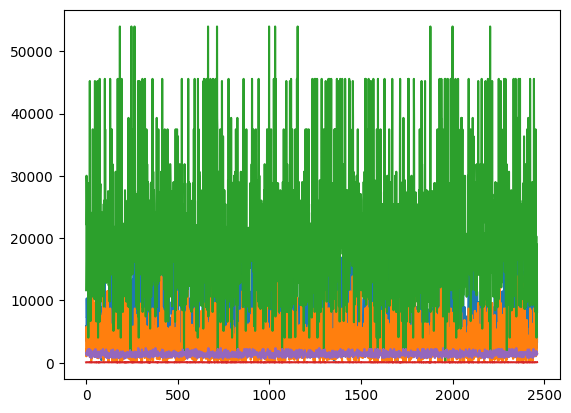

In [62]:
# graph of values before standardization
reshape_df['number_of_houses'].plot(),reshape_df['number_of_units'].plot(),reshape_df['population'].plot(),reshape_df['aus_born_perc'].plot(),reshape_df['median_income'].plot()

From the above plot we can see that the data deoendency is heavily skewed. There is dominating dependency on one of the feature within the data. Therefore, the need of data reshaping comes into place in order have a more uniform and linear relationship between the dependent and independent feature. 

**Z-Score Tranformation / Standardization**

Data standardization is the process of converting data values into a uniform scale or distribution. Making sure that all variables are on an equal footing and removing any bias that may result from variations in the original scales or units of measurement are common preprocessing steps in data analysis and machine learning projects.

Standardisation makes it simpler to analyse and compare data across various factors. When variables have diverse measuring scales or units, it is especially helpful because it converts them to a standardised scale. Standardisation helps algorithms converge more quickly during machine learning training by removing scale disparities and prevents some characteristics from predominating over others based only on their original scales.

In the code below we will scale the scarped columns so that they have their mean close to zero and standard deviation close to one. This will cause our features to have a rather equal impact on the dependent variable than some dominant.

In [63]:
# scale the scraped columns using StandardScaler class from the sklearn.preprocessing S
norm_scale = preprocessing.StandardScaler().fit(reshape_df[['number_of_houses','number_of_units','population', 'aus_born_perc','median_income']])
# applies the scaling to the columns and stores in a df
df_norm = norm_scale.transform(reshape_df[['number_of_houses','number_of_units','population', 'aus_born_perc','median_income',]])
# prints the normalized df
df_norm[0:5]

array([[-0.11473483, -0.49785783, -0.96462438, -0.17063659,  0.64856511],
       [-0.68430096, -0.85657226, -0.4503373 ,  1.11569151, -0.25939199],
       [-0.41401853,  0.77875364,  1.05711655, -0.46748154, -0.29113874],
       [ 0.94737764,  0.35516166,  0.94605605, -0.56642985, -0.35145757],
       [ 0.20808271, -0.70210193,  0.184247  , -0.8632748 , -0.09748355]])

In [64]:
# creates a new df
normal_df = pd.DataFrame()

# adds the scaled values to each column
normal_df['number_of_houses']= df_norm[:,0]
normal_df['number_of_units']= df_norm[:,1]
normal_df['population']= df_norm[:,2]
normal_df['aus_born_perc']= df_norm[:,3]
normal_df['median_income']= df_norm[:,4]

(<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >)

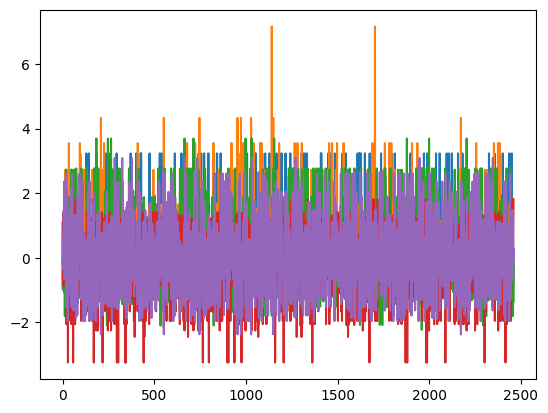

In [65]:
# plotting the scaled values
normal_df['number_of_houses'].plot(),normal_df['number_of_units'].plot(),normal_df['population'].plot(),normal_df['aus_born_perc'].plot(),normal_df['median_income'].plot()

**Min-Max Normalization**

The normalisation of data using the Min-Max method is another well-liked method. It adjusts the values so that they correspond to a predetermined range, usually ranging from 0 to 1. The terms feature scaling and rescaling are also used to describe this normalisation method.
By using min-max normalisation, the feature's minimum and maximum values are scaled to 0 and 1, respectively. Within that range, the remaining numbers are correspondingly scaled. In contrast to the Z-transform, we are scaling the values between 0 and 1 than having their mean and deviation close to the respective values.

In [66]:
# sclaing the scraped columns
minmax = preprocessing.MinMaxScaler().fit(reshape_df[['number_of_houses','number_of_units','population', 'aus_born_perc','median_income']]) 
# applies the scaling to the columns and stores in a df
minmax_df = minmax.transform(reshape_df[['number_of_houses','number_of_units','population', 'aus_born_perc','median_income']])
minmax_df[0:5]

array([[0.28356234, 0.08273026, 0.2131513 , 0.60784314, 0.55264689],
       [0.1616285 , 0.03976151, 0.30002786, 0.8627451 , 0.38627109],
       [0.21949109, 0.23564967, 0.55467633, 0.54901961, 0.38045375],
       [0.51094148, 0.18490954, 0.5359153 , 0.52941176, 0.36940081],
       [0.35267176, 0.0582648 , 0.40722578, 0.47058824, 0.4159395 ]])

In [67]:
# creates a new df
mm_df = pd.DataFrame()
# adds the scaled values to each column
mm_df['number_of_houses_mm'] = minmax_df[:,0]              
mm_df['number_of_units_mm'] = minmax_df[:,1] 
mm_df['population_mm'] = minmax_df[:,2] 
mm_df['aus_born_perc_mm'] = minmax_df[:,3]
mm_df['median_income'] = minmax_df[:,4]  
mm_df.head()

,number_of_houses_mm,number_of_units_mm,population_mm,aus_born_perc_mm,median_income
0,0.283562,0.082730,0.213151,0.607843,0.552647
1,0.161628,0.039762,0.300028,0.862745,0.386271
2,0.219491,0.235650,0.554676,0.549020,0.380454
3,0.510941,0.184910,0.535915,0.529412,0.369401
4,0.352672,0.058265,0.407226,0.470588,0.415939


<Axes: >

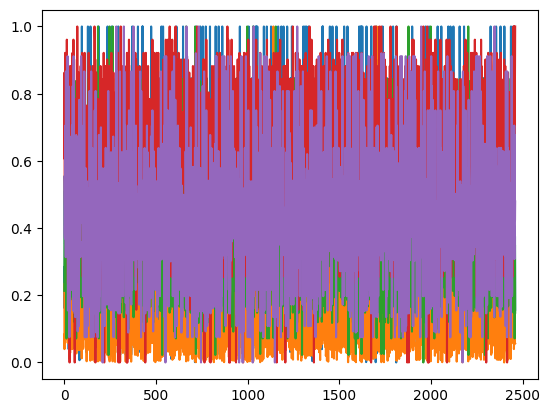

In [68]:
# plotting the scaled values
mm_df['number_of_houses_mm'].plot(), mm_df['number_of_units_mm'].plot(), 
mm_df['population_mm'].plot(), mm_df['aus_born_perc_mm'] .plot(),
mm_df['median_income'] .plot()

**Log Transform**

A mathematical technique known as a log transformation is used to determine a variable's logarithm. It is frequently applied in data analysis and modelling to resolve problems like skewed distributions or to reduce a variable's volatility. Either the common logarithm (base 10) or the natural logarithm (base e) can be used as the logarithm for transformation.
In some circumstances, log transformations can help to linearize relationships, make the data more symmetric, and lessen the influence of outliers.

In [69]:
# creates a new df to perform log transform
log_trfm_df = reshape_df.copy()
# iterates through the df
for idx in list(log_trfm_df.index.values):
  # calculates the log values of each cell values for the dependant variable
  log_trfm_df.at[idx, "number_of_houses"] =  mat.log(log_trfm_df.loc[idx, "number_of_houses"])
  log_trfm_df.at[idx, "number_of_units"] =  mat.log(log_trfm_df.loc[idx, "number_of_units"])
  log_trfm_df.at[idx, "population"] =  mat.log(log_trfm_df.loc[idx, "population"])
  log_trfm_df.at[idx, "aus_born_perc"] =  mat.log(log_trfm_df.loc[idx, "aus_born_perc"])
  log_trfm_df.at[idx, "median_income"] =  mat.log(log_trfm_df.loc[idx, "median_income"])
log_trfm_df.head()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,median_house_price
0,8.675051,7.63627,9.362632,4.204693,7.367077,1148100
1,8.148735,6.934397,9.700269,4.382027,7.167809,1083000
2,8.432942,8.66406,10.309985,4.158883,7.160069,1406500
3,9.24213,8.42442,10.275775,4.143135,7.145196,1129500
4,8.88364,7.297768,10.003016,4.094345,7.206377,1022600


<Axes: >

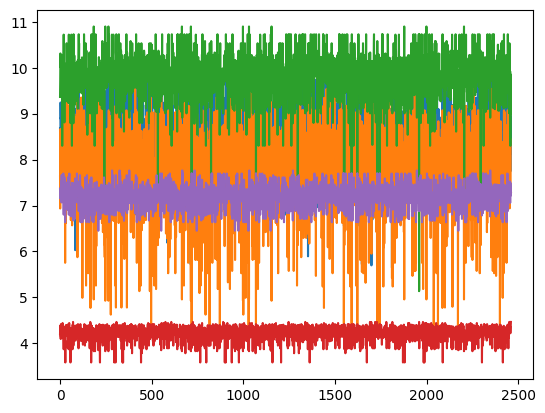

In [70]:
# plotting the scaled values
log_trfm_df['number_of_houses'].plot(), log_trfm_df['number_of_units'].plot(), 
log_trfm_df['population'].plot(), log_trfm_df['aus_born_perc'] .plot(),
log_trfm_df['median_income'] .plot()

**Power Transform**

Square power transformation is a straightforward data transformation method that squares the values of a variable. It is a non-linear transformation that can be used to examine relationships in the data or solve specific problems.
The square transformation can affect the data in a variety of ways:


> Symmetry: Using a square transformation to the original data can assist make the distribution more symmetric if it has a positive or negative skew.


> Outliers: Squaring the variable's values might increase the impact of outliers. Larger than average outliers will have a more significant effect on the transformed numbers.



> The square transformation can be used to investigate and depict non-linear interactions between variables. It can expose patterns that otherwise wouldn't reveal in the actual data.




In [71]:
power_df = reshape_df.copy()
# iterates through the df
for idx in list(power_df.index.values):
  # calculates the sqaured values of each cell values for the dependant variable
  power_df.at[idx, "number_of_houses"] =  mat.pow(log_trfm_df.loc[idx, "number_of_houses"],2)
  power_df.at[idx, "number_of_units"] =  mat.pow(log_trfm_df.loc[idx, "number_of_units"],2)
  power_df.at[idx, "population"] =  mat.pow(log_trfm_df.loc[idx, "population"],2)
  power_df.at[idx, "aus_born_perc"] =  mat.pow(log_trfm_df.loc[idx, "aus_born_perc"],2)
  power_df.at[idx, "median_income"] =  mat.pow(log_trfm_df.loc[idx, "median_income"],2)
power_df.head()

,number_of_houses,number_of_units,population,aus_born_perc,median_income,median_house_price
0,75.256515,58.312613,87.658881,17.67944,54.273824,1148100
1,66.401879,48.085865,94.095222,19.202157,51.377489,1083000
2,71.114505,75.06594,106.2958,17.296309,51.266591,1406500
3,85.416961,70.970849,105.591552,17.165565,51.053828,1129500
4,78.919064,53.257422,100.060331,16.763657,51.931874,1022600


<Axes: >

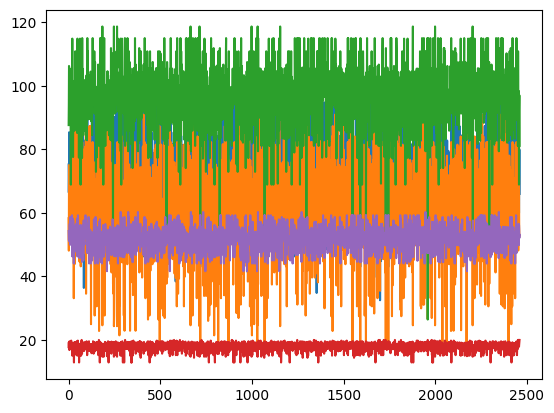

In [72]:
# plotting the scaled values
power_df['number_of_houses'].plot(), power_df['number_of_units'].plot(), 
power_df['population'].plot(), power_df['aus_born_perc'] .plot(),
power_df['median_income'] .plot()

**Box-Cox Transfrom**

By identifying the ideal power parameter (lambda) that maximises the likelihood of the transformed data, the Box-Cox transformation is a well-known power transformation approach that can be used to normalise the distribution of a variable. This transformation works well with variables that are heteroscedastic or non-normal.
The Box-Cox transformation is a versatile method that can aid in normalising a variable's distribution and stabilising its variance, making it more appropriate for specific statistical studies or modelling techniques. The qualities of the data and the desired transformation effect influence the choice of the lambda parameter.
The lambda parameter determines the type of transformation:

> If lambda = 0: It applies a logarithmic transformation to the data.

> If lambda = 1: It applies no transformation to the data.


> If lambda = -1: It applies an inverse transformation to the data.

In [77]:
box_df = reshape_df.copy()

# columns to be transformed
columns_to_transform = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income']

# change column values to float
box_df[columns_to_transform] = box_df[columns_to_transform].astype(float)

 #ransformation on the columns
transformed_data = box_df[columns_to_transform].apply(lambda x: stats.boxcox(x)[0])

transformed_data.head()

,number_of_houses,number_of_units,population,aus_born_perc,median_income
0,26.365302,26.884937,172.015935,32703.665623,42.674395
1,22.964090,21.433344,202.005555,52876.044851,39.296323
2,24.751351,37.084321,269.846542,28886.428093,39.170327
3,30.502645,34.436313,265.502930,27679.818920,38.929277
4,27.827006,24.121374,233.262958,24252.321531,39.929851


<Axes: >

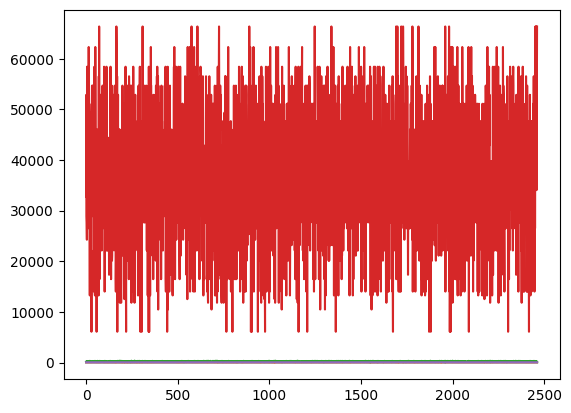

In [78]:
# plotting the scaled values
transformed_data['number_of_houses'].plot(), transformed_data['number_of_units'].plot(), 
transformed_data['population'].plot(), transformed_data['aus_born_perc'] .plot(),
transformed_data['median_income'] .plot()

Observing all the plots we can that the data when transformed using box-cox transformation leads to much more linear and unifrom data. Therefore, we should be using this transfromation for predicting the house prices. Also, log scale transfromation provides least linearity within the data, hence making it unsuitable to train a linear model.

# **References**


> Convert time (HH:MM:SS) to minutes in python - https://stackoverflow.com/questions/48447123/convert-time-hhmmss-to-minutes-in-python


> Box-Cox transformation - https://www.geeksforgeeks.org/box-cox-transformation-using-python/


> Power Transform - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html


> Reading shape files - https://gis.stackexchange.com/questions/113799/reading-shapefile-in-python






